# Feature Selection

<section style="background: papayawhip;
                padding: 20px;
                width: 500px;
                line-height: 1.7em;">
<h2>Outline<span class="tocSkip"></span></h2>
<hr>
<div class="toc"><ul class="toc-item">
    <li><span><a href="#1.-What-is-Feature-Selection?" data-toc-modified-id="1.-What-is-Feature-Selection?-1">1. What is Feature Selection?</a></span></li>
    <li><span><a href="#2.-Why-use-Feature-Selection?" data-toc-modified-id="2.-Why-use-Feature-Selection?-2">2. Why use Feature Selection?g</a></span></li>
    <li><span><a href="#3.-Feature-Selection-Techniques" data-toc-modified-id="3.-Feature-Selection-Techniques-3">3. Feature Selection Techniques</a></span></li>
    <li><span><a href="#4.-Workflow" data-toc-modified-id="4.-Workflow-4">4. Workflow</a></span></li>
     <li><span><a href="#5.-Bibliography" data-toc-modified-id="5.-Bibliography-5">5. Bibliography</a></span></li>
    <li><span><a href="#6.-No-Feature-Selection" data-toc-modified-id="5.-No-Feature-Selection-6">6. No Feature Selection</a></span></li>
    <li><span><a href="#7.-Kaggle-Model" data-toc-modified-id="7.-Kaggle-Model-5">7. Kaggle Model</a></span></li></ul></div>
</section> 

<br />
<button onclick="toggle();">Toggle style</button>

<script>
  let toggle = () => {
     let element = document.getElementById("mysection");

     if (element.style.backgroundColor === "papayawhip") {
       element.style.backgroundColor = "#222";
       element.style.color = "white";
    } else {
       element.style.backgroundColor = "papayawhip";
       element.style.color = "black";
    }
  }
</script>

## What is Feature Selection?
___

In machine learning and statistics, feature selection, also known as **variable selection**, **attribute selection** or **variable subset selection**, is the process of selecting a subset of relevant features or variables from a larger set of features that are available in a dataset.

In other words, it is the process of identifying and choosing the most important features in a dataset that contribute the most to the predictive power of a model, while discarding or ignoring less important or irrelevant features.

###  Iris Example

The iris dataset contains 150 samples of iris flowers with four features: sepal length, sepal width, petal length, and petal width, as well as the target variable, which is the species of the flower (setosa, versicolor, or virginica).

>We want to build a machine learning model to classify the iris flowers based on their features. Before building the model, we may want to perform feature selection to identify the most important features for classification.

We can use the <u>chi-square test</u>, a filter-based feature selection technique, to determine the importance of each feature. **The chi-square test measures the dependence between two variables, and in our case, we can use it to measure the dependence between each feature and the target variable (species).**

Text(0.5, 1.0, 'Chi-Square Test Results')

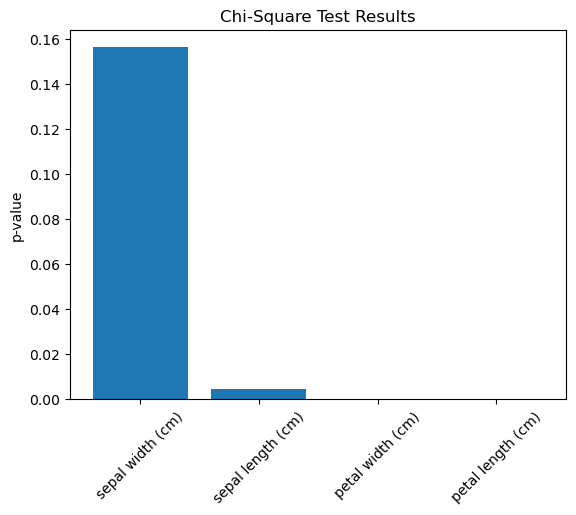

In [4]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest, chi2
import pandas as pd
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = iris.target

# perform chi-square test
chi_scores = chi2(X, y)
p_values = pd.Series(chi_scores[1], index = iris.feature_names)
p_values.sort_values(ascending = False, inplace = True)

# create bar plot of p-values
plt.bar(p_values.index, p_values.values)
plt.xticks(rotation=45)
plt.ylabel('p-value')
plt.title('Chi-Square Test Results')


We first perform the chi-square test on the iris dataset and extract the p-values for each feature. We then sort the p-values in descending order using the sort_values function from the Pandas library. Finally, we create a bar plot of the p-values using the bar function from the Matplotlib library. The rotation=45 parameter rotates the x-axis labels by 45 degrees to avoid overlapping.


We can easily see which features have the highest and lowest p-values, indicating which features are most and least significant for predicting the target variable in the iris dataset.

## Why use Feature Selection?
___

The purpose of feature selection is to improve the performance of machine learning models by reducing the complexity of the data, which can improve model accuracy, reduce overfitting, and enhance the interpretability of the model. Feature selection methods can be either filter-based, wrapper-based or embedded, and can be performed manually or automatically using machine learning algorithms. Some popular feature selection techniques include correlation-based feature selection, recursive feature elimination, and principal component analysis.

### EDA on Breast Cancer Diagnosis Data

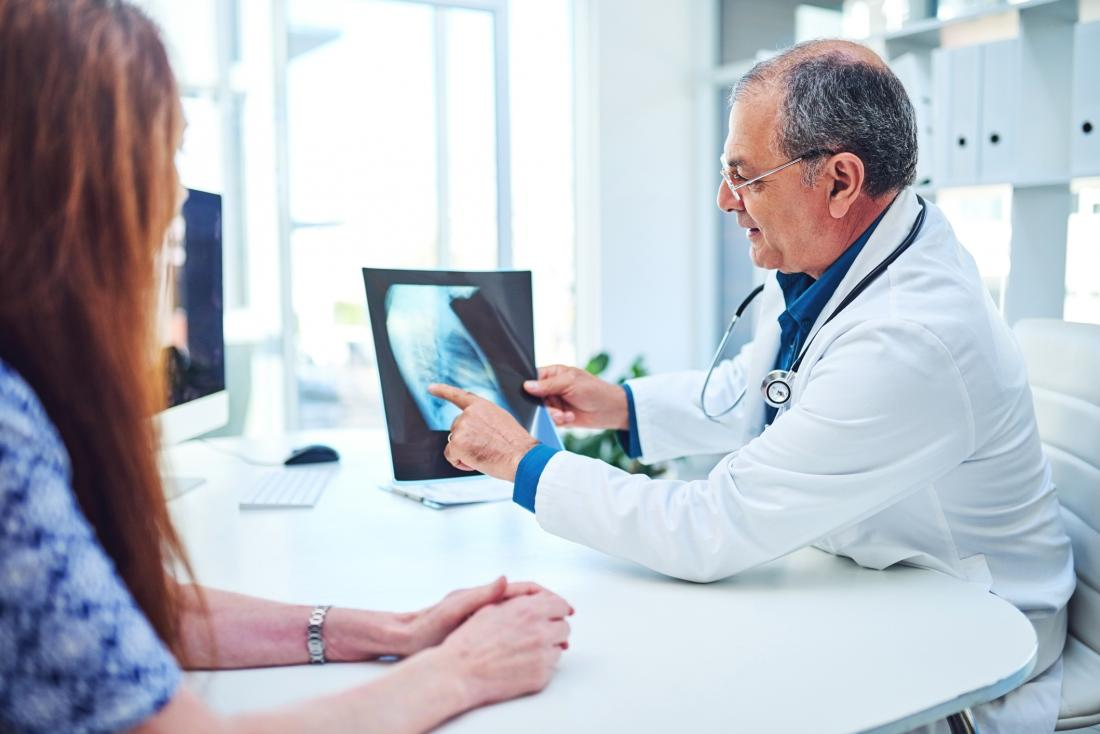

In [64]:
from IPython import display
display.Image("https://cdn-prod.medicalnewstoday.com/content/images/articles/325/325750/doctor-and-patient-with-breast-scan.jpg")

(569, 31)
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64


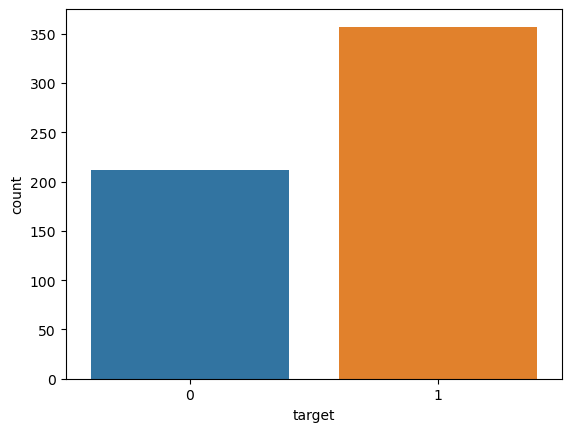

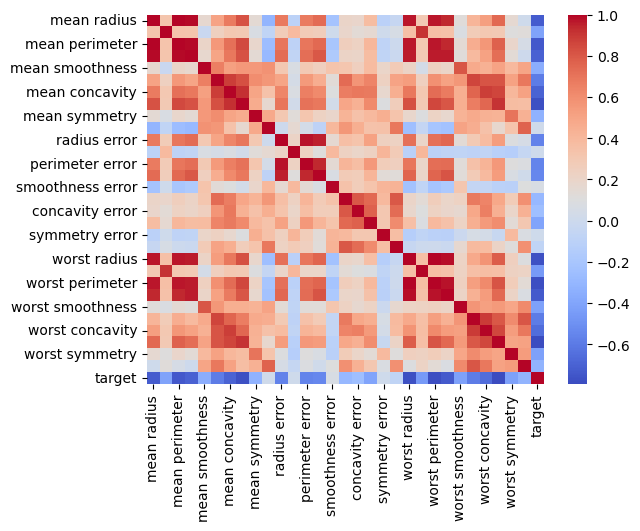

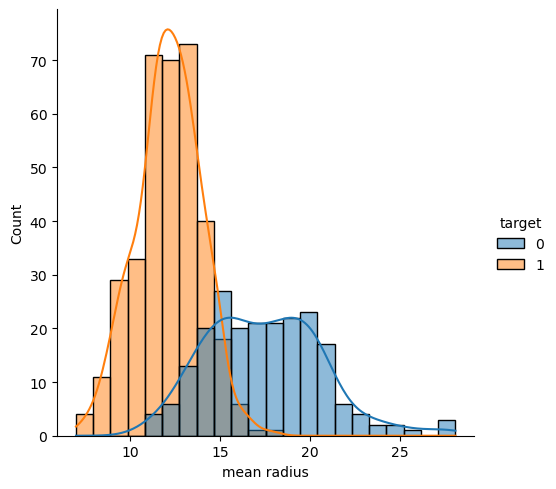

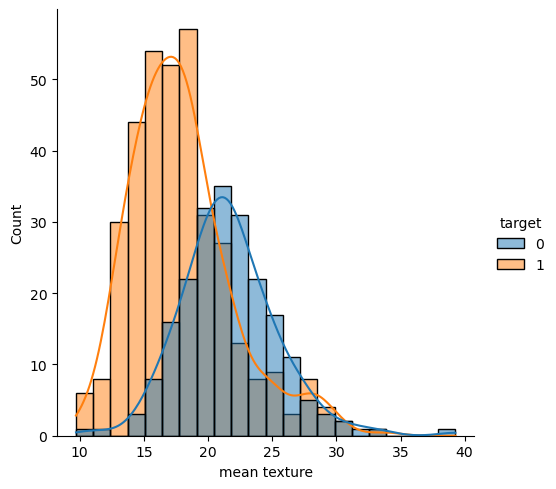

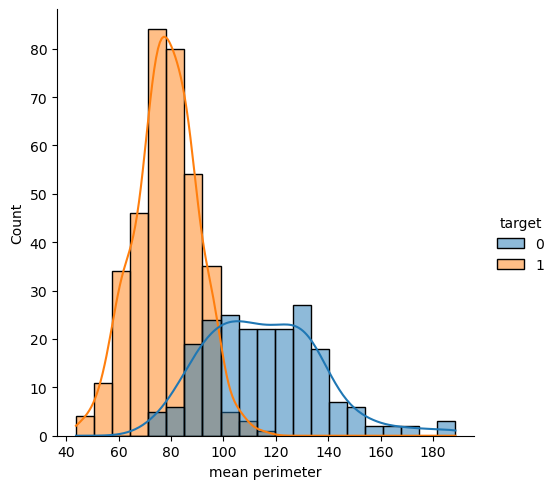

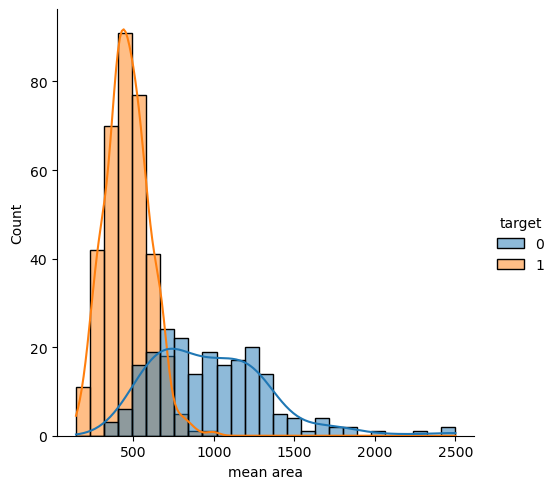

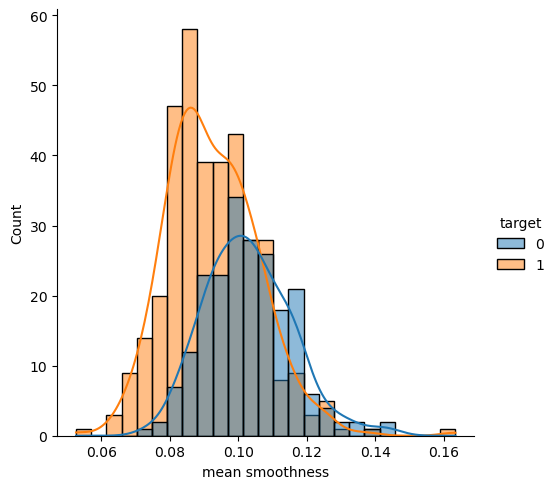

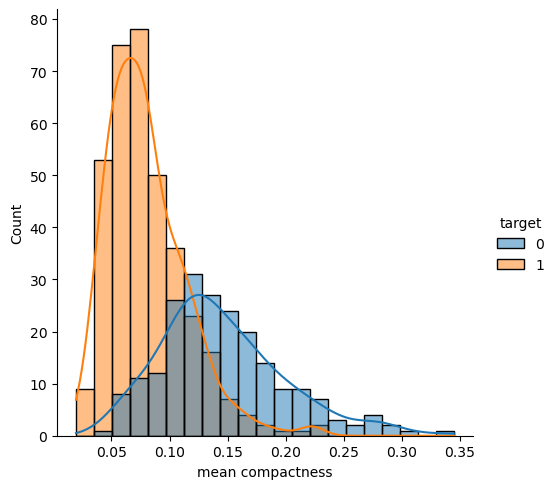

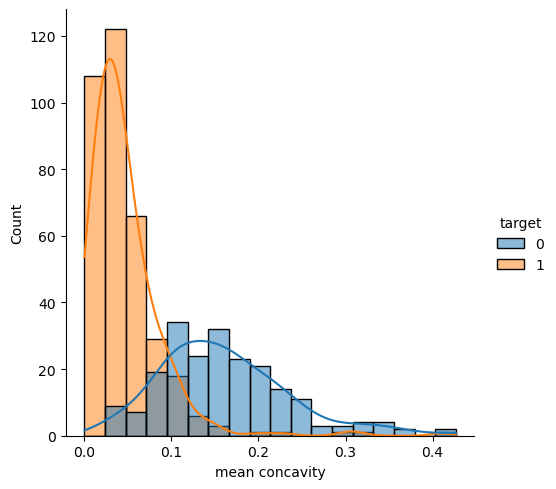

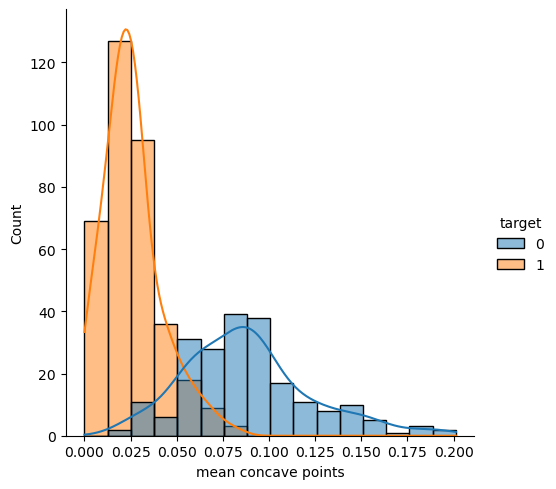

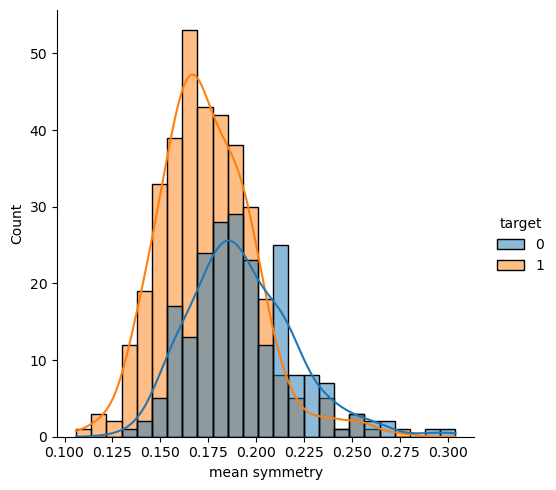

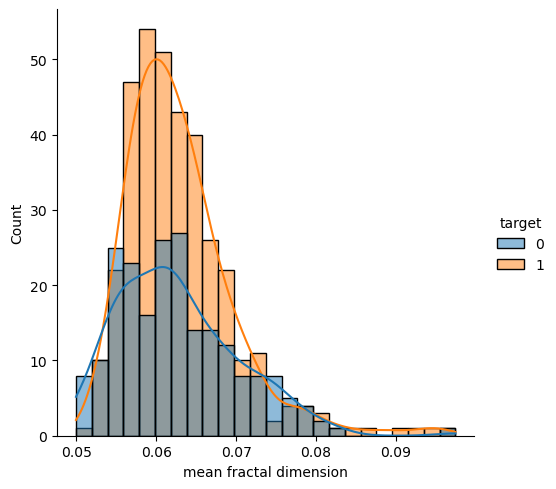

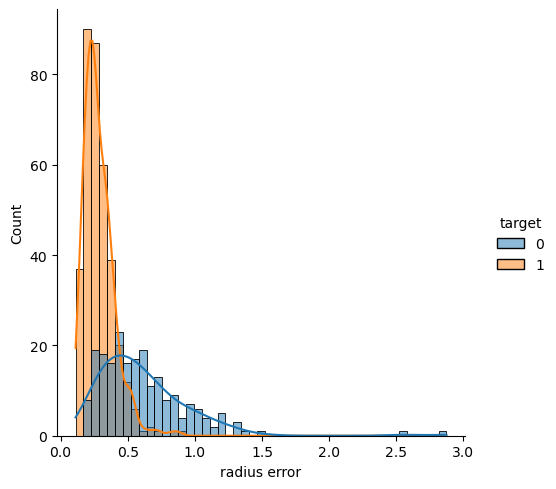

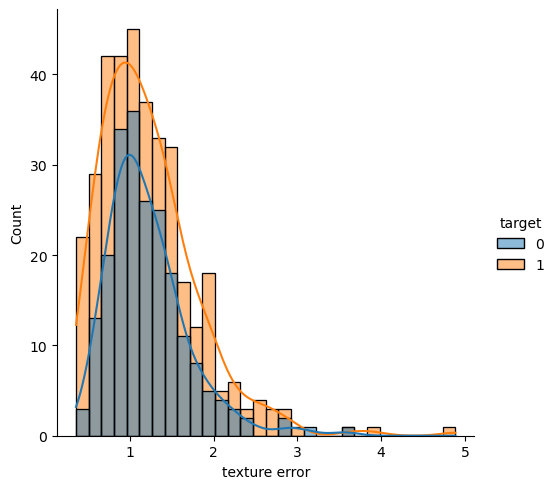

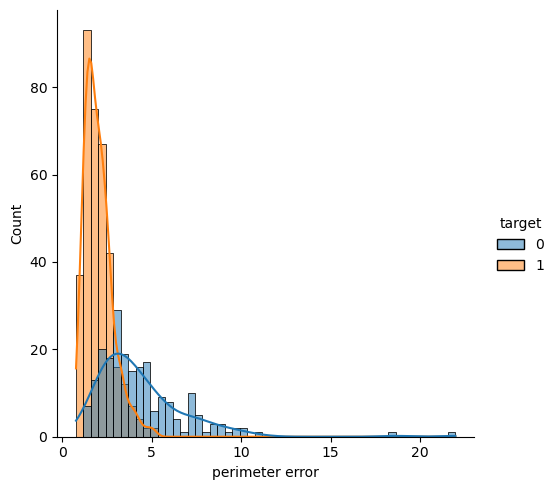

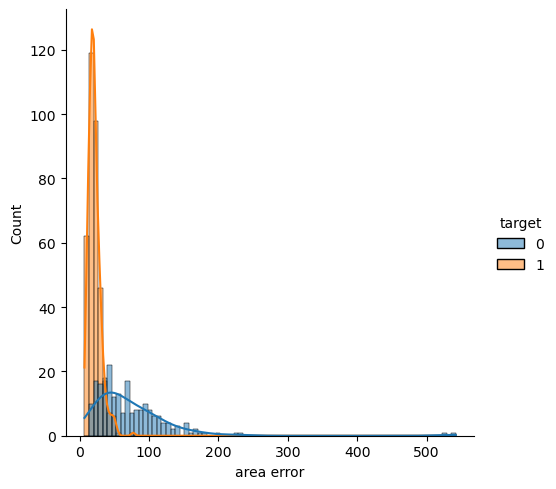

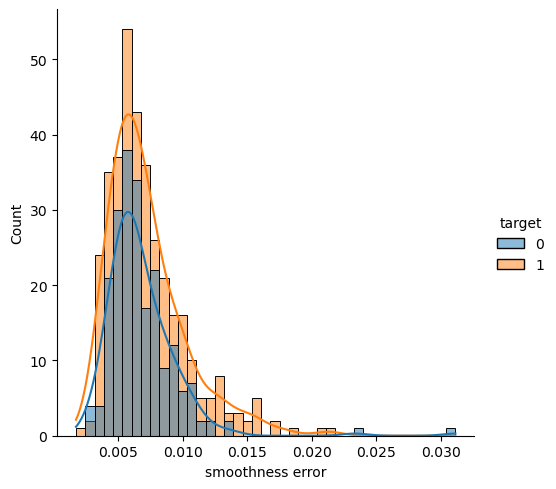

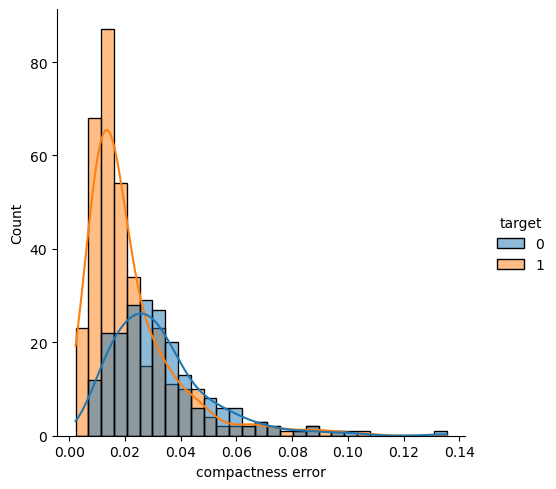

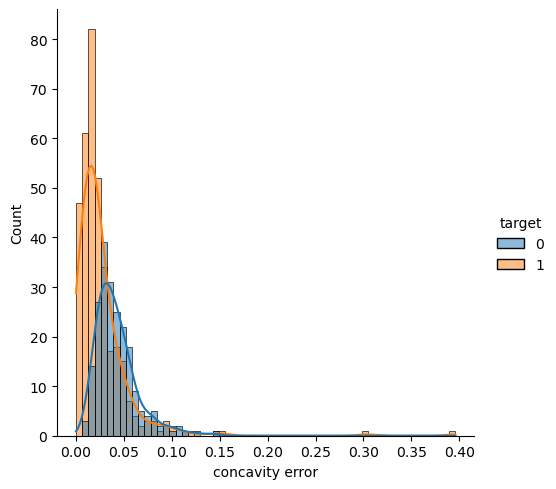

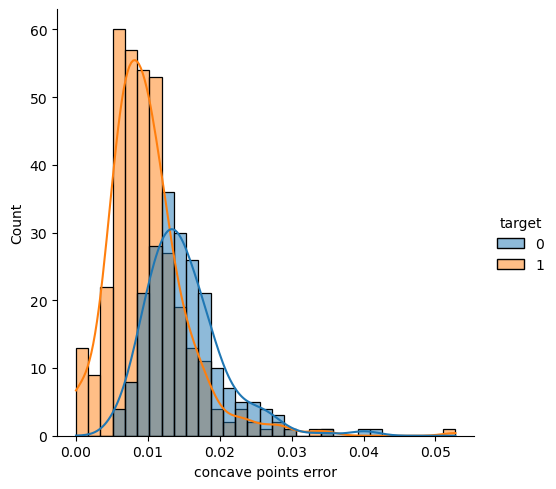

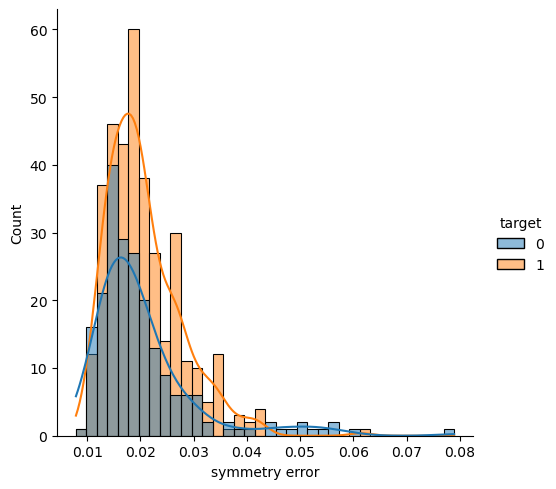

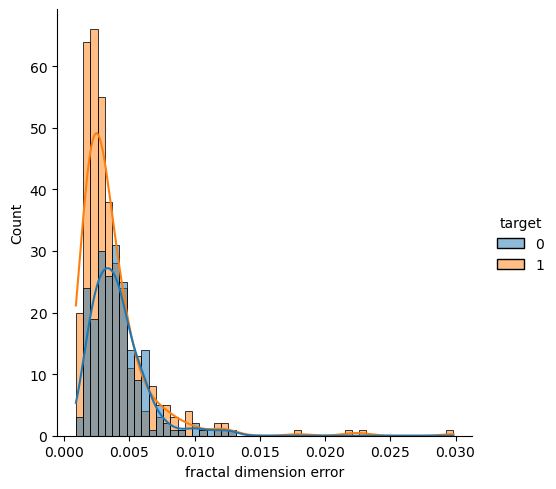

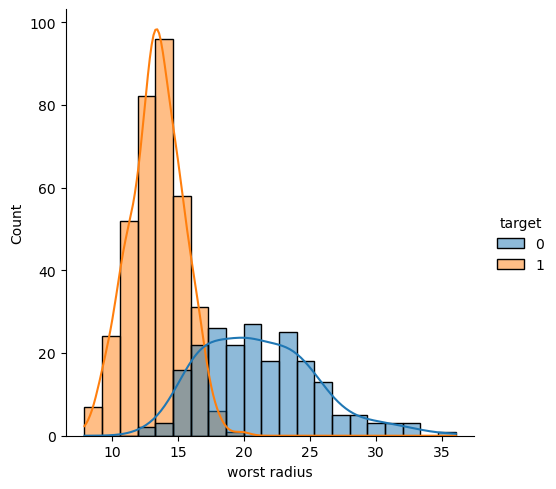

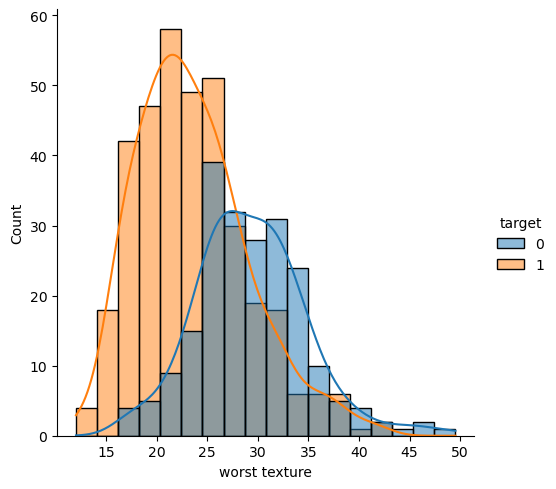

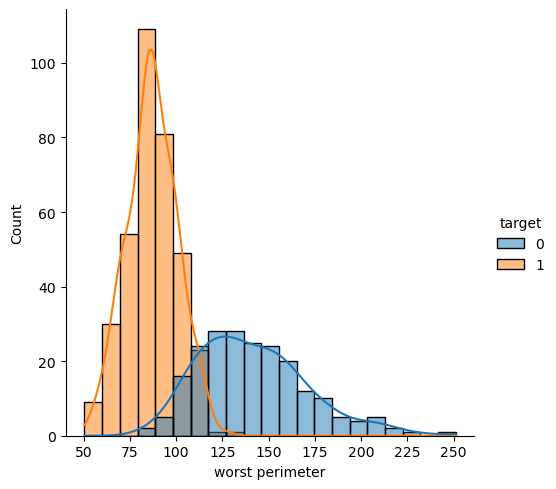

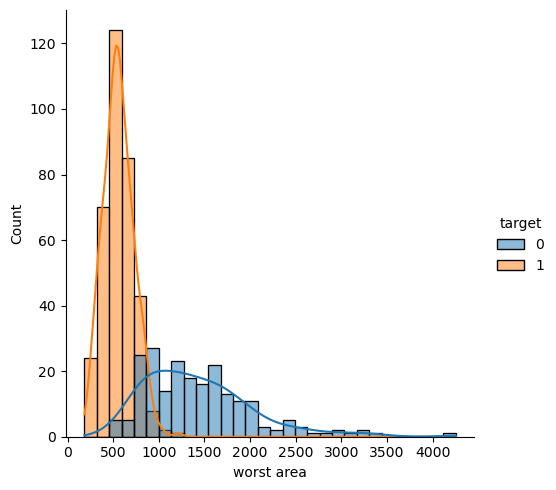

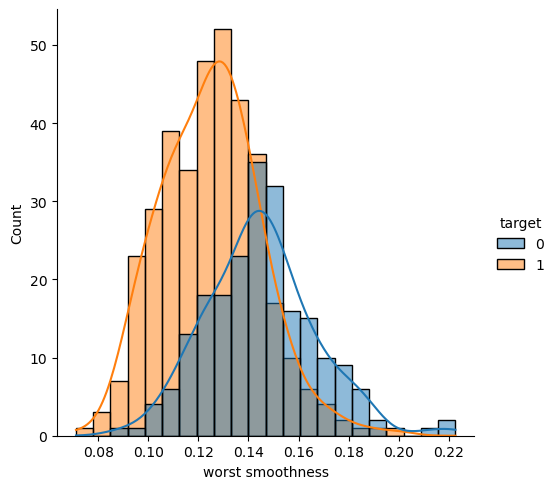

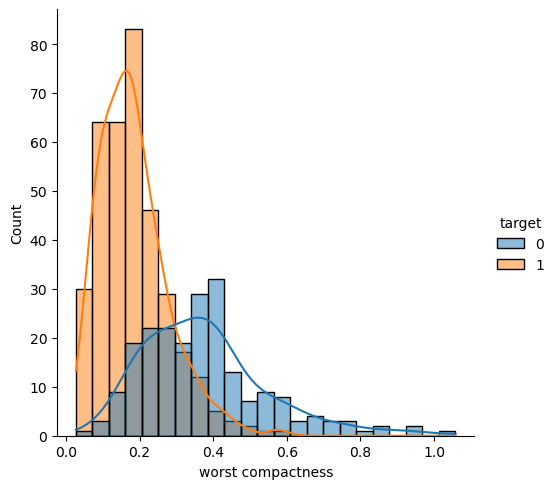

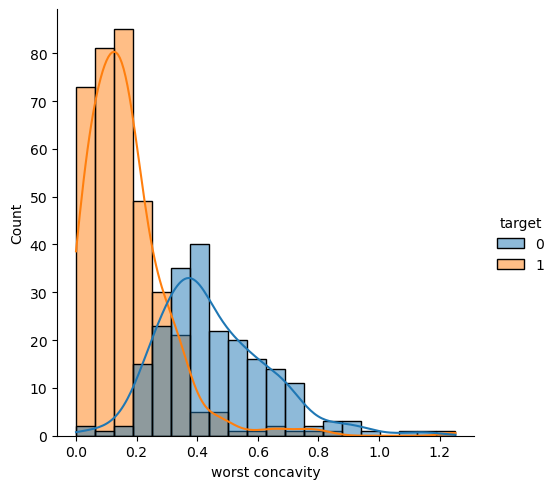

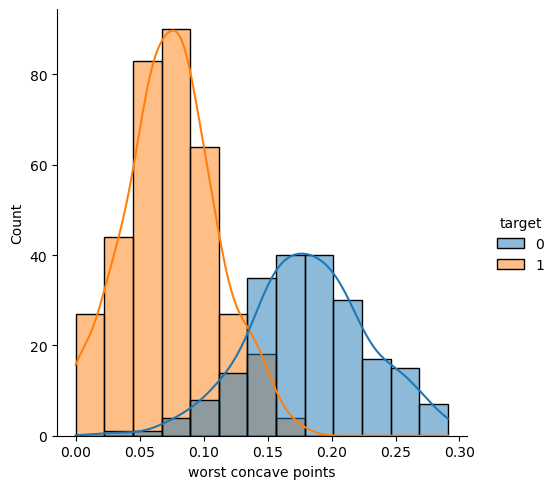

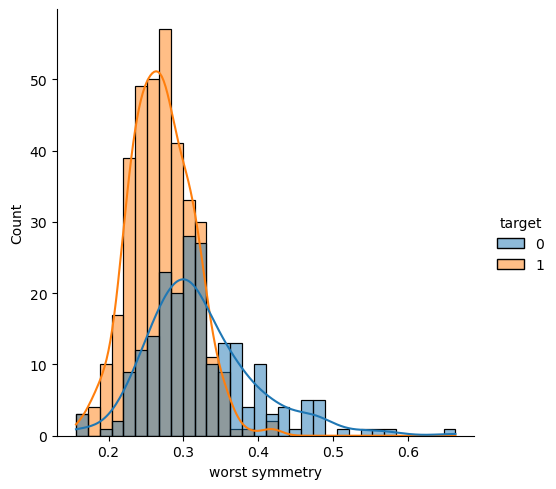

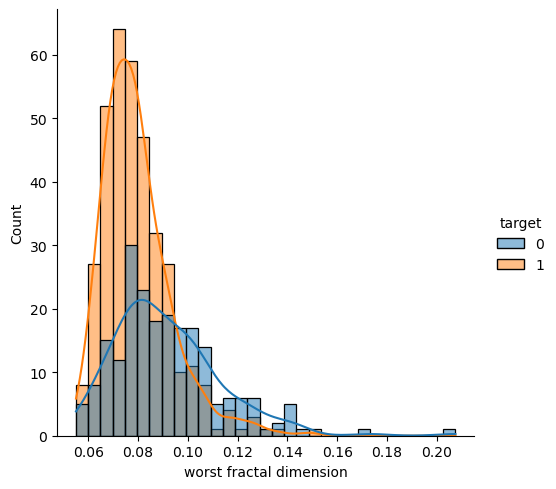

In [91]:
# Load necessary libraries and dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

# Create a pandas dataframe from the dataset
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = pd.Series(data.target)

# Check the shape of the dataframe
print(df.shape)   # (569, 31)

# Check for missing values
print(df.isnull().sum())

# Check the target variable distribution
sns.countplot(x='target', data=df)
plt.show()

# Check the correlation between features
corr = df.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.show()

# Plot distribution of individual features
for feature in data.feature_names:
    sns.displot(df, x=feature, hue='target', kde=True)
    plt.show()


### Breast Cancer Diagnosis

In [63]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Loading the dataset
data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'], name='target')

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a logistic regression model on all features
lr_all_features = LogisticRegression(max_iter=10000, random_state=42)
lr_all_features.fit(X_train, y_train)

# Making predictions on the test set with all features
y_pred_all_features = lr_all_features.predict(X_test)

# Computing the accuracy score with all features
acc_all_features = accuracy_score(y_test, y_pred_all_features)
print('Accuracy with all features:', acc_all_features)

# Performing feature selection with SelectKBest and f_classif
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)

# Transforming the data to keep only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Fitting a logistic regression model on selected features
lr_selected_features = LogisticRegression(max_iter=10000, random_state=42)
lr_selected_features.fit(X_train_selected, y_train)

# Making predictions on the test set with selected features
y_pred_selected_features = lr_selected_features.predict(X_test_selected)

# Computing the accuracy score with selected features
acc_selected_features = accuracy_score(y_test, y_pred_selected_features)
print('Accuracy with selected features:', acc_selected_features)


Accuracy with all features: 0.956140350877193
Accuracy with selected features: 0.9912280701754386


We performed feature selection using the `SelectKBest` method with the `f_classif` metric to select the top 10 features. The accuracy score of the new model, <u>0.9912, which is higher than 0.9561.</u>

## Feature Selection Techniques
___

There are several techniques for performing feature selection. Each technique has its strengths and weaknesses, and the choice of method depends on the nature of the data and the problem at hand. 

>It is often a good idea to try different feature selection techniques and compare their performance to select the best one for the problem at hand.

### Filter-based Methods

These methods select features based on their statistical properties, such as correlation with the target variable, variance, or mutual information. Examples of filter-based methods include Chi-square test, Pearson correlation, and ANOVA.
ques and compare their performance to select the best one for the problem at hand.

<img src = "https://www.analyticsindiamag.com/wp-content/uploads/2019/04/filte.jpg">


In [71]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif

# Loading the dataset
data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'], name='target')

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing feature selection with SelectKBest and f_classif
selector = SelectKBest(f_classif, k=10)
selector.fit(X_train, y_train)

# Transforming the data to keep only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Printing the names of the selected features
selected_feature_names1 = X.columns[selector.get_support()].tolist()
print('Selected features:', selected_feature_names)


Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']


The SelectKBest method selects the top k features based on a score function, in this case, the f_classif function, which computes the ANOVA F-value between each feature and the target variable. The selected features are then transformed and used for model training and evaluation.

In [72]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Loading the dataset
data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'], name='target')

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing feature selection with SelectKBest and f_regression
selector = SelectKBest(f_regression, k=10)
selector.fit(X_train, y_train)

# Transforming the data to keep only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Printing the names of the selected features
selected_feature_names2 = X.columns[selector.get_support()].tolist()
print('Selected features:', selected_feature_names)


Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']


In this example, we use SelectKBest with the f_regression metric to select the top 10 features based on the Pearson correlation.

In [73]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, chi2

# Loading the dataset
data = load_breast_cancer()
X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'], name='target')

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing feature selection with SelectKBest and f_regression
selector = SelectKBest(chi2, k=10)
selector.fit(X_train, y_train)

# Transforming the data to keep only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Printing the names of the selected features
selected_feature_names3 = X.columns[selector.get_support()].tolist()
print('Selected features:', selected_feature_names)


Selected features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']


In [75]:
print('Selected features (ANOVA):', selected_feature_names1)
print('')
print('Selected features (Peasrson Corr):', selected_feature_names2)
print('')
print('Selected features (Chi Square):', selected_feature_names3)

Selected features (ANOVA): ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']

Selected features (Peasrson Corr): ['mean radius', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'worst radius', 'worst perimeter', 'worst area', 'worst concavity', 'worst concave points']

Selected features (Chi Square): ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']


>Filter-based methods are simple and fast to compute, making them suitable for large datasets with many features. They can be useful for identifying relevant features that are highly correlated with the target variable and discarding irrelevant features that are not informative. However, filter-based methods may not capture complex relationships between features and the target variable, and they may not be suitable for feature engineering tasks that require feature combination or transformation.

### Wrapper-based Methods

Wrapper-based methods are a type of feature selection method that involves training a machine learning model iteratively on different subsets of features to determine the optimal set of features that yields the best performance on a given task.

<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Wrapper_1.png">

These methods use a search algorithm to explore the space of possible feature subsets, evaluating the performance of the model at each step and selecting the subset of features that leads to the best performance. Because wrapper-based methods involve repeatedly training and evaluating a model on different subsets of features, they can be computationally expensive and time-consuming.


#### Forward Selection: 
_Forward selection is an iterative method in which we start with having no feature in the model. In each iteration, we keep adding the feature which best improves our model till an addition of a new variable does not improve the performance of the model._

In [79]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42)

# Create an empty list to store selected features
selected_features = []

# Create a logistic regression model
model = LogisticRegression(max_iter=10000)

# Loop over the features and add the best feature at each step
for i in range(X_train.shape[1]):
    best_acc = 0
    best_feature = None
    for feature in range(X_train.shape[1]):
        # Skip features that have already been selected
        if feature in selected_features:
            continue
        # Add the feature and train the model
        features = selected_features + [feature]
        model.fit(X_train[:, features], y_train)
        # Evaluate the model on the test set
        y_pred = model.predict(X_test[:, features])
        acc = accuracy_score(y_test, y_pred)
        # Keep track of the best feature so far
        if acc > best_acc:
            best_acc = acc
            best_feature = feature
    # Add the best feature to the list of selected features
    selected_features.append(best_feature)
    print(f'Selected feature {best_feature} with accuracy {best_acc:.3f}')
    

Selected feature 22 with accuracy 0.965
Selected feature 0 with accuracy 0.974
Selected feature 13 with accuracy 0.991
Selected feature 26 with accuracy 1.000
Selected feature 2 with accuracy 1.000
Selected feature 3 with accuracy 1.000
Selected feature 4 with accuracy 1.000
Selected feature 5 with accuracy 1.000
Selected feature 6 with accuracy 1.000
Selected feature 8 with accuracy 1.000
Selected feature 7 with accuracy 1.000
Selected feature 9 with accuracy 1.000
Selected feature 10 with accuracy 1.000
Selected feature 14 with accuracy 1.000
Selected feature 15 with accuracy 1.000
Selected feature 16 with accuracy 1.000
Selected feature 17 with accuracy 1.000
Selected feature 18 with accuracy 1.000
Selected feature 19 with accuracy 1.000
Selected feature 24 with accuracy 1.000
Selected feature 25 with accuracy 1.000
Selected feature 27 with accuracy 1.000
Selected feature 28 with accuracy 1.000
Selected feature 29 with accuracy 1.000
Selected feature 11 with accuracy 0.991
Selected 

In this example, we start by loading the breast cancer dataset and splitting it into training and test sets. We then create an empty list to store the selected features, and a logistic regression model.

We loop over the features in the dataset, and at each step we select the feature that leads to the highest accuracy when added to the set of previously selected features. We skip features that have already been selected, and train the logistic regression model on the training set using only the selected features. We then evaluate the accuracy of the model on the test set using the selected features, and keep track of the feature that leads to the highest accuracy. We add the best feature to the list of selected features and repeat the process until we have selected the desired number of features.

In [80]:
# Print the best selected features
print(f'Best selected features: {selected_features}')

Best selected features: [22, 0, 13, 26, 2, 3, 4, 5, 6, 8, 7, 9, 10, 14, 15, 16, 17, 18, 19, 24, 25, 27, 28, 29, 11, 12, 20, 23, 1, 21]


We printed the list of selected features using the selected_features list. This will output the index of each feature in the original dataset that was selected. You can use this list to subset your original dataset and train your final model on the selected features.

#### Backward Elimination
_In backward elimination, we start with all the features and removes the least significant feature at each iteration which improves the performance of the model. We repeat this until no improvement is observed on removal of features._

In [83]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load the breast cancer dataset
data = load_breast_cancer()

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42)

# Create a logistic regression model
model = LogisticRegression(max_iter=5000)

# Fit the model to the training data
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f'Original accuracy: {acc:.3f}')

# Loop over the features and remove the worst feature at each step
while True:
    worst_acc = acc
    worst_feature = None
    for feature in range(X_train.shape[1]):
        # Remove the feature and train the model
        features = list(range(X_train.shape[1]))
        features.remove(feature)
        model.fit(X_train[:, features], y_train)
        # Evaluate the model on the test set
        y_pred = model.predict(X_test[:, features])
        acc = accuracy_score(y_test, y_pred)
        # Keep track of the worst feature so far
        if acc < worst_acc:
            worst_acc = acc
            worst_feature = feature
    # If no feature has been removed, stop
    if worst_feature is None:
        break
    # Remove the worst feature from the dataset
    X_train = np.delete(X_train, worst_feature, axis=1)
    X_test = np.delete(X_test, worst_feature, axis=1)
    # Print information about the removed feature
print(f'Removed feature {worst_feature} with accuracy {worst_acc:.3f}')
    
# Fit the model to the reduced dataset
model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f'Reduced accuracy: {acc:.3f}')


Original accuracy: 0.956
Removed feature None with accuracy 0.956
Reduced accuracy: 0.956


In this example, we start by training a logistic regression model on the full dataset and evaluating its accuracy on the test set. We then loop over the features and remove the worst feature at each step. To determine the worst feature, we train a logistic regression model on the reduced dataset (with the current feature removed) and evaluate its accuracy on the test set. We keep track of the worst accuracy and feature, and remove the worst feature from the dataset. We repeat this process until no feature can be removed without decreasing the accuracy of the model.

After backward elimination is complete, we train a new logistic regression model on the reduced dataset and evaluate its accuracy on the test set. This will give us an idea of how well the model performs on the reduced feature set. You can use the reduced dataset to train other models as well.

#### Recursive Feature elimination

_In RFE, the algorithm starts with all the features and repeatedly trains a model on the current set of features, evaluates the performance of the model, and removes the least important feature(s) from the set. The process is repeated until the desired number of features is reached._

In [85]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a logistic regression model
model = LogisticRegression(max_iter=10000)

# Create a recursive feature elimination object
rfe = RFE(model, n_features_to_select=10)

# Fit the RFE object to the data
rfe.fit(data.data, data.target)

# Print the selected features
print('Selected Features:')
for i in range(len(data.feature_names)):
    if rfe.support_[i]:
        print(data.feature_names[i])


Selected Features:
mean radius
mean compactness
mean concavity
texture error
worst radius
worst smoothness
worst compactness
worst concavity
worst concave points
worst symmetry


The RFE object will recursively eliminate the least important features until the desired number of features is reached.

**Note** that the number of features to select is a hyperparameter that can be tuned for optimal performance. In this example, we selected 10 features, but you may want to experiment with different values to find the best number of features for your specific problem.

_In the above examples, we created logistic regression models and set the max_iter parameter to 10000. This will allow the algorithm to run for a longer period of time before stopping. You can adjust the value of max_iter as needed to balance between computational time and convergence. Note that increasing max_iter may not always result in better performance and may also increase the risk of overfitting._

>Wrapper-based methods can be effective at selecting a subset of features that are highly predictive for a given task, but they can also be computationally expensive and prone to overfitting if the search space is too large.

### Embedded Methods

In contrast to filter and wrapper methods that perform feature selection independently of the model, embedded methods integrate feature selection as part of the model training process. This approach can lead to more efficient and accurate feature selection, as the model is able to learn which features are most important for prediction.

<img src = "https://www.analyticsvidhya.com/wp-content/uploads/2016/11/Embedded_1.png">

Embedded methods work by incorporating a penalty term into the model training process that encourages the model to select only the most important features. Commonly used embedded methods include Lasso regression, Ridge regression, and Elastic Net regression. These methods work by adding a penalty term to the model that penalizes the magnitude of the coefficients of the features. This penalty term forces the model to minimize the number of features used, and can result in a subset of the most important features being selected.

In [87]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import Lasso

# Load the breast cancer dataset
data = load_breast_cancer()

# Create a Lasso regression model with a regularization parameter of 0.1
lasso = Lasso(alpha=0.1)

# Fit the model to the data
lasso.fit(data.data, data.target)

# Print the coefficients of the model
print('Coefficients:')
for i in range(len(data.feature_names)):
    print(f'{data.feature_names[i]}: {lasso.coef_[i]}')



Coefficients:
mean radius: -0.0
mean texture: -0.0
mean perimeter: -0.0
mean area: 0.0003178279562361115
mean smoothness: -0.0
mean compactness: -0.0
mean concavity: -0.0
mean concave points: -0.0
mean symmetry: -0.0
mean fractal dimension: -0.0
radius error: -0.0
texture error: -0.0
perimeter error: -0.0
area error: -0.00027708067223344325
smoothness error: -0.0
compactness error: -0.0
concavity error: -0.0
concave points error: -0.0
symmetry error: -0.0
fractal dimension error: -0.0
worst radius: -0.0
worst texture: -0.011098361119286847
worst perimeter: -0.019819997597308382
worst area: 0.00039046606105089986
worst smoothness: -0.0
worst compactness: -0.0
worst concavity: -0.0
worst concave points: -0.0
worst symmetry: -0.0
worst fractal dimension: -0.0


In this example, we load the breast cancer dataset and create a Lasso regression model with a regularization parameter of 0.1. We then fit the model to the data and print out the coefficients of the model. The Lasso regression model will automatically perform feature selection as part of the model training process, by penalizing the magnitude of the coefficients of the features. Features with coefficients close to zero are effectively removed from the model, while features with non-zero coefficients are selected as the most important features for prediction.

Note that the regularization parameter alpha is a hyperparameter that can be tuned for optimal performance. A larger value of alpha will result in more aggressive feature selection, while a smaller value of alpha will result in less aggressive feature selection. In this example, we set alpha to 0.1, but you may want to experiment with different values to find the best value for your specific problem.

>The main disadvantage of embedded methods for feature selection is that they can be computationally expensive and time-consuming, especially for large datasets with a large number of features. This is because the feature selection is performed as part of the model training process, which can make the model training slower and more resource-intensive.

>Another potential disadvantage of embedded methods is that they may not always select the best subset of features for prediction. This is because the feature selection is tied to the specific model used, so if the model is not a good fit for the data, the selected features may not be the most informative ones for prediction. In addition, embedded methods may not be able to handle certain types of data, such as data with high dimensionality or nonlinear relationships between features and target variables.

>Finally, embedded methods can be sensitive to the choice of hyperparameters, such as the regularization parameter in Lasso regression. Tuning the hyperparameters to find the best balance between model complexity and performance can be time-consuming and requires careful validation to avoid overfitting or underfitting the model.

### Dimensionality Reduction Methods

Dimensionality reduction is the process of reducing the number of features or variables in a dataset while preserving the most important information contained in the data. The goal of dimensionality reduction is to simplify the data and make it more manageable, while still allowing for accurate and meaningful analysis.

Dimensionality reduction methods can be broadly classified into two categories: feature selection and feature extraction.

#### Feature Extraction Methods

Feature extraction methods, on the other hand, transform the original features into a lower-dimensional space using techniques such as principal component analysis (PCA), linear discriminant analysis (LDA), or t-distributed stochastic neighbor embedding (t-SNE). These methods create new features that are linear or nonlinear combinations of the original features, and are designed to capture the most important information in the data while discarding the least important information.

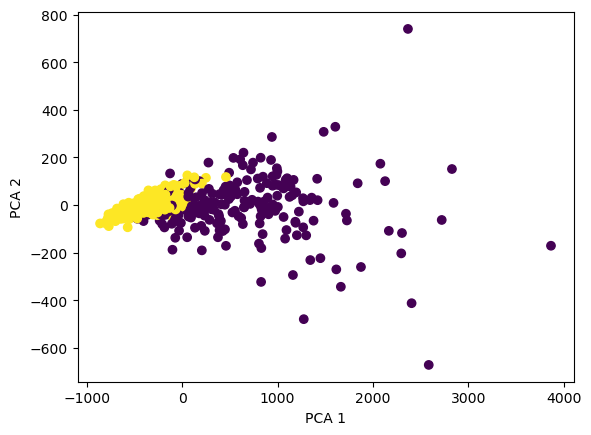

In [88]:
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA

# Load the breast cancer dataset
data = load_breast_cancer()

# Apply PCA to the data
pca = PCA(n_components=2)
X_pca = pca.fit_transform(data.data)

# Visualize the transformed data
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0], X_pca[:,1], c=data.target)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()


We applied PCA to the data using the PCA class, specifying that we want to reduce the dimensionality to 2 principal components using the n_components argument. Finally, we visualized the transformed data using a scatter plot, coloring each point by its target class (malignant or benign).

By applying PCA to the breast cancer dataset, we can reduce the dimensionality from 30 features to just 2 principal components, while still preserving a significant amount of the variation in the data. This can make the data more interpretable and easier to visualize, and can also improve the performance of machine learning models trained on the data.

In [89]:
from sklearn.datasets import load_breast_cancer
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Load the breast cancer dataset
data = load_breast_cancer()

# Apply LDA to the data
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(data.data, data.target)

# Visualize the transformed data
import matplotlib.pyplot as plt
plt.scatter(X_lda[:,0], X_lda[:,1], c=data.target)
plt.xlabel('LDA 1')
plt.ylabel('LDA 2')
plt.show()


ValueError: n_components cannot be larger than min(n_features, n_classes - 1).

C:\Users\DONGY\Anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


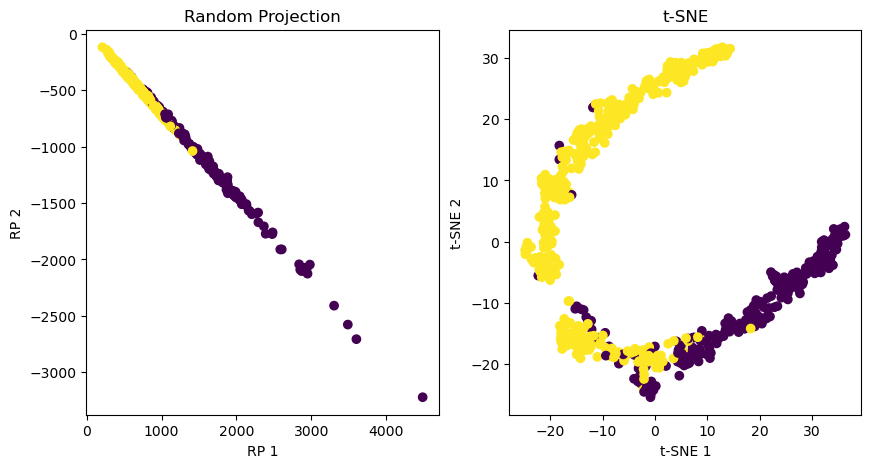

In [90]:
from sklearn.datasets import load_breast_cancer
from sklearn.random_projection import GaussianRandomProjection
from sklearn.manifold import TSNE

# Load the breast cancer dataset
data = load_breast_cancer()

# Apply Random Projection to the data
rp = GaussianRandomProjection(n_components=2)
X_rp = rp.fit_transform(data.data)

# Apply t-SNE to the data
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200)
X_tsne = tsne.fit_transform(data.data)

# Visualize the transformed data
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.scatter(X_rp[:,0], X_rp[:,1], c=data.target)
plt.title('Random Projection')
plt.xlabel('RP 1')
plt.ylabel('RP 2')
plt.subplot(122)
plt.scatter(X_tsne[:,0], X_tsne[:,1], c=data.target)
plt.title('t-SNE')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.show()


In this example, we load the breast cancer dataset using the load_breast_cancer function from Scikit-learn. We then apply Random Projection to the data using the GaussianRandomProjection class and t-SNE to the data using the TSNE class, specifying that we want to reduce the dimensionality to 2 components. Finally, we visualize the transformed data using a scatter plot, coloring each point by its target class (malignant or benign).

Random Projection and SNE can be useful when the original data has a high number of dimensions and the goal is to reduce the dimensionality for visualization, clustering or classification purposes. However, it's important to note that these techniques can result in loss of information and may not always produce meaningful lower-dimensional representations of the data.

>The disadvantage of feature extraction methods are:

>1. Information loss: Feature extraction methods may result in information loss as they transform the original high-dimensional data into a lower-dimensional space.

>2. Overfitting: Feature extraction methods may lead to overfitting of the model if the extracted features are specific to the training data and do not generalize well to new data.

>3. Computationally expensive: Some feature extraction methods, especially those based on iterative algorithms, may be computationally expensive and require a lot of time and resources to compute.

>4. Interpretability: In some cases, the extracted features may be difficult to interpret or may not have a clear physical or biological meaning.

>5. Lack of flexibility: Feature extraction methods are typically designed for a specific task and may not be easily adaptable to other tasks or data types.

## Workflow
___

<p>We can summarize feature selection as follows.</p>
<ul>
<li><strong>Feature Selection</strong>: Select a subset of input features from the dataset.
<ul>
<li><strong>Unsupervised</strong>: Do not use the target variable for selecting the feature importance of Input variable (e.g. remove redundant variables).
<ul>
<li>Correlation</li>
</ul>
</li>
<li><strong>Supervised</strong>: Use the target variable (e.g. remove irrelevant I/P features).
<ul>
<li><strong>Wrapper Method</strong>: Search for well-performing subsets of features.
<ul>
<li>Recursive Feature Elimination (RFE)</li>
</ul>
</li>
<li><strong>Filter Method</strong>: Select subsets of features based on their relationship with the target.
<ul>
<li>Statistical Methods</li>
<li>Feature Importance Methods</li>
</ul>
</li>
<li><strong>Intrinsic</strong>: Algorithms that perform automatic feature selection during training.
<ul>
<li>Decision Trees</li>
</ul>
</li>
</ul>
</li>
</ul>
</li>
<li><strong>Dimensionality Reduction</strong>: Project input data into a lower-dimensional feature space.</li>
</ul>


In [93]:
# Load necessary libraries and dataset
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create logistic regression object
logreg = LogisticRegression(max_iter=5000)

# Create RFE object and fit on training data
rfe = RFE(estimator=logreg, n_features_to_select=10)
rfe.fit(X_train, y_train)

# Print selected features
print('Selected features:', X_train.columns[rfe.support_])

# Transform training and testing data
X_train_rfe = rfe.transform(X_train)
X_test_rfe = rfe.transform(X_test)

# Fit logistic regression model on selected features
logreg.fit(X_train_rfe, y_train)

# Predict on testing data and evaluate accuracy
y_pred = logreg.predict(X_test_rfe)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Selected features: Index(['mean radius', 'mean compactness', 'mean concavity', 'texture error',
       'worst radius', 'worst smoothness', 'worst compactness',
       'worst concavity', 'worst concave points', 'worst symmetry'],
      dtype='object')
Accuracy: 0.9736842105263158


## Bibliography
___

Brownlee, J. (2017). Feature engineering for machine learning: Principles and techniques for data scientists. Machine Learning Mastery.

Guyon, I., & Elisseeff, A. (2003). An introduction to variable and feature selection. Journal of Machine Learning Research, 3, 1157-1182.

Guyon, I., Weston, J., Barnhill, S., & Vapnik, V. (2002). Gene selection for cancer classification using support vector machines. In G. Altman, A. Krzywinski, & M. J. H. Miller (Eds.), Proceedings of the Pacific Symposium on Biocomputing 2002 (pp. 4-15). World Scientific.

Hastie, T., Tibshirani, R., & Friedman, J. (2009). The elements of statistical learning: Data mining, inference, and prediction (2nd ed.). Springer.

Li, J., Chen, Y., Li, X., & Huang, L. (2019). Feature selection: A data perspective. ACM Computing Surveys, 52(2), Article 38.

Zhang, L., Huang, Y., & Li, Y. (2019). Feature selection via recursive conditional heteroscedasticity. In Proceedings of the 2019 IEEE International Conference on Big Data (pp. 4831-4836). IEEE.

## No Feature Selection 

In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
data = load_wine()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], random_state=42)

# Fit a random forest classifier to the training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 1.0


In [3]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the wine dataset
data = load_wine()

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], random_state=42)

# Perform feature selection using SelectKBest and f_classif
selector = SelectKBest(f_classif, k=5)
selector.fit(X_train, y_train)
X_train = selector.transform(X_train)
X_test = selector.transform(X_test)

# Fit a random forest classifier to the training data
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9777777777777777


>Note that the accuracy of the model with feature selection may or may not be better than the accuracy of the model without feature selection. It depends on the dataset and the specific problem you are trying to solve. In general, feature selection can be helpful in reducing the number of features and improving the interpretability of the model, but it may also result in information loss if important features are discarded.

## Kaggle Model
___

### Introducing Kaggle Models

#### [Models](https://www.kaggle.com/models)